### Exercise: Scrape `unegui.mn`
* Scrape apartment listings from `https://www.unegui.mn/l-hdlh/l-hdlh-zarna/oron-suuts-zarna/`
* Use only the first page
  * Get the `listing title` and `listing price`
  * Make a dataframe and make a histogram using `listing price`

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import requests
from bs4 import BeautifulSoup

In [2]:
# Your code here
response = requests.get("https://www.unegui.mn/l-hdlh/l-hdlh-zarna/oron-suuts-zarna/")

In [3]:
soup = BeautifulSoup(response.content)

#### Getting the titles

In [9]:
list_titles = soup.find_all("div", {"class":"advert__content"})

In [31]:
list_titles[0].find_all("a")[0].get_text(strip=True)

'520 сая₮'

In [36]:
test = '520 сая₮'
test.split(" ")

['520', 'сая₮']

In [21]:
list_titles[0].find_all("a")[1].text.strip()


'Зүүн 4 зам, зүүн хүрээ хотхоны урд талд дуплекс 5 өрөө байр'

In [32]:
listing_titles = []
listing_prices = []
for list_title in list_titles:
    price = list_title.find_all("a")[0].get_text(strip=True)
    title = list_title.find_all("a")[1].get_text(strip=True)
    listing_titles.append(title)
    listing_prices.append(price)
    

#### Print out listing prices
*If it has a discount price, get only the latest price.*

Example: https://www.unegui.mn/adv/7705747_golden-park-102-r-bair-5-davkhart-1-oroo-bair-zarna/

* `get_text(strip=True)` to get the text inside of a `div`
* Use `split()` function to split your price and get only the number from the string
* Convert the price to float
* If your price is in **Тэрбум** multiply the price by billion
* If your price is in **сая** millions multiply the price by million

In [38]:
clean_prices = []
for price in listing_prices:
    num = float(price.split(" ")[0])
    amount = price.split(" ")[1]
    if "Тэрбум" in amount:
        num = num * 1_000_000_000
    else:
        num = num * 1_000_000
    clean_prices.append(num)

In [39]:
clean_prices

[520000000.0,
 1090000000.0,
 3600000000.0,
 169500000.0,
 65000000.0,
 3100000.0,
 504000000.0,
 627000000.0,
 130000000.0,
 992630000.0,
 3300000.0,
 110000000.0,
 110000000.0,
 3400000.0,
 471000000.0,
 153000000.0,
 67200000.0,
 227680000.0,
 626500000.0,
 8500000.0,
 3500000.0,
 500000000.0,
 184000000.0,
 184500000.0,
 315000000.0,
 375000000.0,
 4500000.0,
 7200000.0,
 63000000.0,
 1900000000.0,
 280800000.0,
 140000000.0,
 120000000.0,
 258000000.0,
 250000000.0,
 1650000000.0,
 160000000.0,
 132000000.0,
 260000000.0,
 135000000.0,
 582000000.0,
 1700000000.0,
 320000000.0,
 165000000.0,
 990000000.0,
 100000000.0,
 135000000.0,
 3090000.0,
 200000000.0,
 3300000.0,
 442000000.0,
 561410000.0,
 125000000.0,
 119000000.0,
 135000000.0,
 1160000000.0,
 3350000.0,
 190000000.0,
 5800000.0,
 194000000.0]

In [40]:
df = pd.DataFrame({"title": listing_titles, "price": clean_prices})
df

,title,price
0,"Зүүн 4 зам, зүүн хүрээ хотхоны урд талд дуплек...",520000000.00
1,River garden 4өрөө байр 161мкв,1090000000.00
2,Sky garden-ы баруун урд river garden хотхоны r...,3600000000.00
3,"Сбд, дөлгөөн нуур хангай хотхоны хойно sayan r...",169500000.00
4,СХД 20-р хороо цэргийн хотхоны зүүн талд 1 өрө...,65000000.00
5,Худ туул гарден хотхонд 2 өрөө 65.5мк байр,3100000.00
6,Цэнгэлдэх хотхонд 12 давхарт 70м2 3өрөө,504000000.00
7,Худ яармаг garden city 2т 4 өрөө 145.8мк байр,627000000.00
8,Gal togoo tusdaa 2 uruu 50m2 bair,130000000.00
9,Villa verde zaisan 4 uruu 143.86,992630000.00


<Axes: ylabel='Frequency'>

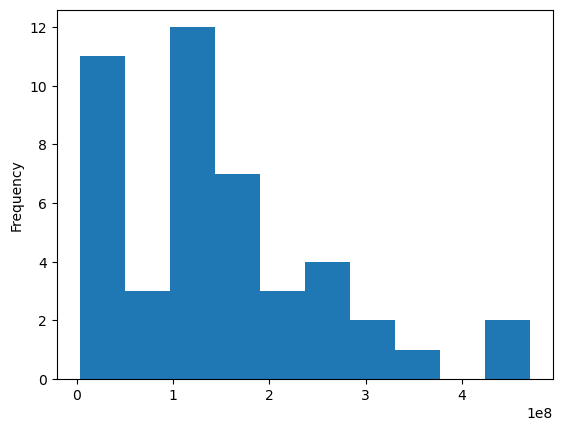

In [43]:
df[df['price'] < 500_000_000]['price'].plot.hist()